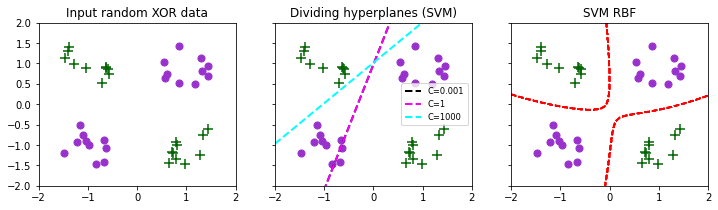

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import ranf
from sklearn import svm

# Example random XOR dataset
X = np.concatenate([np.array([-1.5,-1.5]) + ranf((10,2)), np.array([0.5, 0.5]) + ranf((10,2)),
                    np.array([-1.5, 0.5]) + ranf((10,2)), np.array([0.5,-1.5]) + ranf((10,2))], axis=0)
y = np.concatenate([np.full(10, 0), np.full(10, 0), np.full(10, 1), np.full(10, 1)], axis=0)

X_mn, X_mx = -2, 2

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(12, 3))

# Plot the data points
def plotX(_ax, X, y, _title):
    _ax.scatter(X[y==0,0], X[y==0,1], marker='o', color='darkorchid', s=50)
    _ax.scatter(X[y==1,0], X[y==1,1], marker='+', color='darkgreen', s=90)
    _ax.set_xlim(X_mn, X_mx)
    _ax.set_ylim(X_mn, X_mx)
    _ax.set_title(_title)

# Plot the decision boundary of a classifier using mesh and contour, 2-dims
def plot_decisionboundary(_ax, _h, _X, _clf, color='r'):  # h = step size in the mesh
    xx1, xx2 = np.meshgrid(np.arange(X_mn, X_mx, _h), np.arange(X_mn, X_mx, _h))
    Y = _clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    _ax.contour(xx1, xx2, Y, colors=color, linestyles='dashed')

def svc_linear(_X, _y, _ax, C=10, color='r'):
    clf = svm.SVC(kernel='linear', C=C, tol=1e-2).fit(_X, _y)
    # dividing hyperplane
    a = -clf.coef_[0][0] / clf.coef_[0][1]
    x1_plot = np.linspace(X_mn, X_mx)
    x2_plot = a*x1_plot - clf.intercept_[0]/clf.coef_[0][1]
    _ax.plot(x1_plot, x2_plot, linestyle='--', color=color, linewidth=2, label=f'C={C:g}')

def svc_rbf(_X, _y, _ax, _gamma, C=10, color='r'):
    clf = svm.SVC(kernel='rbf', gamma=_gamma, C=C).fit(_X, _y)
    plot_decisionboundary(_ax, 0.01, _X, clf, color)

plotX(ax[0], X, y, 'Input random XOR data')

plotX(ax[1], X, y, 'Dividing hyperplanes (SVM)')
svc_linear(X, y, ax[1], C=1e-3, color='k')
svc_linear(X, y, ax[1], C=1, color='magenta')
svc_linear(X, y, ax[1], C=1e3, color='cyan')
ax[1].legend(fontsize='small')

plotX(ax[2], X, y, 'SVM RBF')
svc_rbf(X, y, ax[2], 0.5)

plt.show()

In [2]:
def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

X_train, y_train = load_mnist('mnist/', kind='train')
print(f'Rows= {X_train.shape[0]}, columns= {X_train.shape[1]}')

X_test, y_test = load_mnist('mnist/', kind='t10k')
print(f'Rows= {X_test.shape[0]}, columns= {X_test.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

def get_acc(_y_test, _y_pred):
    return ((np.sum(_y_test == _y_pred)).astype(float) / _y_test.shape[0])

In [ ]:
%%time

# 1 layer neural network
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, activation='logistic')
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

print(f'Accuracy= {get_acc(y_test,y_pred)*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

In [ ]:
%%time

# 2 layer neural network
mlp = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=300)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

print(f'Accuracy= {get_acc(y_test,y_pred)*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

In [5]:
class NeuralNetMLP(object):

    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h = np.dot(X, self.w_h)
        a_h = self.sigmoid(z_h)
        z_out = np.dot(a_h, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])
                sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h)  # Eq 6
                grad_w_out = np.dot(a_h.T, delta_out)  # Eq 7
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)  # Eq 8
                
                #Error handling
                #print( len( self.w_out ), self.eta, len( grad_w_out ) )
                
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h -= self.eta*grad_w_h  # Eq 9
            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        return self

In [6]:
# Define and fit the neural network
nn = NeuralNetMLP(n_hidden=20, epochs=10, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

10/10 | Cost: 35508.14 | Train/Valid Acc.: 91.16%/93.08% 